In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!bash download_data.sh

Getting airports data
Getting airlines data
Getting routes data
Getting planes data


In [1]:
airports = pd.read_csv('airports.dat', header=None, names=
                      ["AirportID","Name", "City", "Country", "IATA", "ICAO",
                       "Latitude", "Longitude", "Altitude", "Timezone", "DST", "TzDatabaseTimeZone",
                       "Type", "Source"])
airlines = pd.read_csv('airlines.dat', header=None, names=
                       ["AirlineID", "Name", "Alias", "IATA", "ICAO", "Callsign", "Country", "Active"])
routes = pd.read_csv('routes.dat', header=None, names=
                     ['Airline', 'AirlineID', 'SourceAirport', 'SourceAirportID', 'DestinationAirport',
                      'DestinationAirportID', 'Codeshare', 'Stops', 'Equipment'])
planes = pd.read_csv('planes.dat', header=None, names=
                     ['Name', 'IATA code', 'ICAO code'])

routes

NameError: name 'pd' is not defined

Getting in bound data
Getting out bound data
Plotting


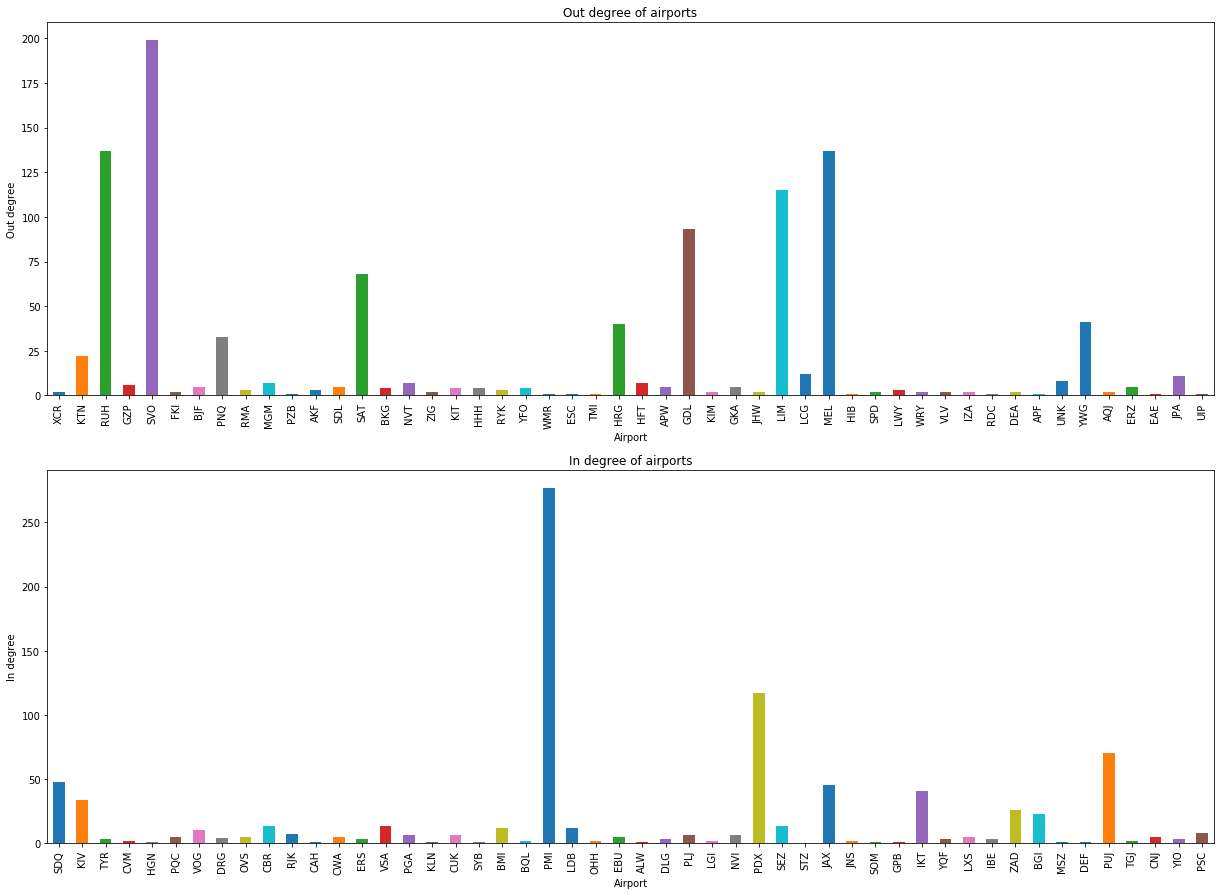

In [40]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 6]

print("Getting in bound data")
aggregated_stats = routes \
    .groupby('SourceAirport') \
    .size() \
    .reset_index(name='OutBoundFlights') \
    .rename(columns = {'SourceAirport': 'Airport'}) \
    .set_index('Airport')

print("Getting out bound data")
aggregated_stats = aggregated_stats.join(
    routes \
        .groupby('DestinationAirport') \
        .size() \
        .reset_index(name='InBoundFlights') \
        .rename(columns = {'DestinationAirport': 'Airport'}) \
        .set_index('Airport'))

print("Plotting")
plt.subplots_adjust(left=0.1, right=1, top=2, bottom=0.1)
plt.subplot(2, 1, 1)
plt.title('Out degree of airports')
plt.ylabel('Out degree')
aggregated_stats.sample(50)['OutBoundFlights'].plot.bar()

plt.subplot(2, 1, 2)
plt.title('In degree of airports')
plt.ylabel('In degree')
aggregated_stats.sample(50)['InBoundFlights'].plot.bar()
plt.show()

In [56]:
print('Summary for out degrees\n')
print('Minimum of out degree: %d' % aggregated_stats['OutBoundFlights'].min())
print('Median of out degree: %.2f' % aggregated_stats['OutBoundFlights'].median())
print('Average of out degree: %.2f' % aggregated_stats['OutBoundFlights'].mean())
print('Maximum of out degree: %d' % aggregated_stats['OutBoundFlights'].max())

print('\n')

print('Summary for in degrees\n')
print('Minimum of in degree: %d' % aggregated_stats['OutBoundFlights'].min())
print('Median of in degree: %.2f' % aggregated_stats['OutBoundFlights'].median())
print('Average of in degree: %.2f' % aggregated_stats['OutBoundFlights'].mean())
print('Maximum of in degree: %d' % aggregated_stats['OutBoundFlights'].max())


Summary for out degrees

Minimum of out degree: 1
Median of out degree: 4.00
Average of out degree: 19.85
Maximum of out degree: 915


Summary for in degrees

Minimum of in degree: 1
Median of in degree: 4.00
Average of in degree: 19.85
Maximum of in degree: 915
